In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv("/content/drive/MyDrive/Data_science/table_data.csv")
data.head()

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT
0,2016-01-09 0:18:14,9/1/2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38
1,2016-01-09 2:28:34,9/1/2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27
2,2016-01-09 4:00:34,9/1/2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44
3,2016-01-09 10:26:27,9/1/2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51
4,2016-01-09 11:37:59,9/1/2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45


In [37]:
data = data[data['CURRENCY'] == 'EUR']

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CREATED_DATE             4851 non-null   object 
 1   CREATED_DATE minus Hour  4851 non-null   object 
 2   USER_ID                  4851 non-null   object 
 3   TRANSACTION_ID           4851 non-null   object 
 4   TYPE                     4851 non-null   object 
 5   CURRENCY                 4851 non-null   object 
 6   AMOUNT                   4851 non-null   float64
dtypes: float64(1), object(6)
memory usage: 303.2+ KB


In [39]:
# Calculate total transaction amount made by each user
user_transaction_amounts = data.groupby('USER_ID')['AMOUNT'].sum()

# Calculate the total transaction amount
total_transaction_amount = user_transaction_amounts.sum()

# Calculate the percentage of total transaction amount for each user
user_transaction_percentages = (user_transaction_amounts / total_transaction_amount) * 100

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'USER_ID': user_transaction_percentages.index,
    'Transaction_Percentage': user_transaction_percentages.values
})

# Print the resulting DataFrame
print("User Transaction Amount Percentages:")
print(result_df)

User Transaction Amount Percentages:
                                  USER_ID  Transaction_Percentage
0    00a2e510-355c-4f46-898c-4155e327ccf3                0.085495
1    00a98617-0d8e-45d8-bca0-b67fe5d3471d                0.160835
2    014b3a6c-5341-4620-ab9d-91ea69907c51                0.153040
3    0169a613-81c2-44d9-a90e-39e3cab34380                0.127157
4    01d7f34c-1474-4d0d-94e3-e538dfcb2157                0.217107
..                                    ...                     ...
936  fec28ec7-84d6-45f8-b00a-d0f309ab30b5                0.151797
937  ff04cdba-42cc-4b9d-a619-8d166957160f                0.032372
938  ff822972-1969-4f22-a711-72f603f901c6                0.006602
939  ff861ba2-d984-47ae-95a1-5fe143e0710c                0.097895
940  ffc8a89d-8e53-4066-b622-36a60e2e9983                0.074144

[941 rows x 2 columns]


In [40]:
# Sort the DataFrame by 'Transaction_Percentage' in descending order
result_df_sorted = result_df.sort_values(by='Transaction_Percentage', ascending=False)
result_df_sorted=result_df_sorted.reset_index()
result_df_sorted=result_df_sorted.drop(columns = "index", axis = 1)
temp_result_df_sorted = result_df_sorted.copy()
result_df_sorted

,USER_ID,Transaction_Percentage
0,06bb2d68-bf61-4030-8447-9de64d3ce490,1.400715
1,d35f19f3-d9ad-48bf-bd1e-90f3ba4f0b98,1.171394
2,d1bc3cd6-154e-479f-8957-a69cdf414462,0.894942
3,6cae3eb6-515c-4811-8b51-32fb2e95da28,0.867503
4,20100a1d-12bc-41ed-a5e1-bc46216e9696,0.849044
...,...,...
936,25dce1a9-289f-4dc0-bd56-872ffcf3ad16,0.001109
937,19be5a1d-6d20-454b-b2b7-7a0e90c6af58,0.001104
938,34b957f3-917a-4b4a-9a86-0f66b0a83d8b,0.000757
939,7eb81b2e-11c5-4519-9724-26401b369f91,0.000673


In [41]:
# Calculate cumulative sum of transaction percentages
result_df_sorted['Cumulative_Percentage'] = result_df_sorted['Transaction_Percentage'].cumsum()

# Calculate the number of people needed to reach each specified percentage threshold
percentage_thresholds = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
num_people_needed = []

for threshold in percentage_thresholds:
    num_people = len(result_df_sorted[result_df_sorted['Cumulative_Percentage'] <= threshold])
    num_people_needed.append(num_people)

# Create a DataFrame to store the results
percentage_summary = pd.DataFrame({
    'Percentage_Threshold': percentage_thresholds,
    'Num_People_Needed': num_people_needed
})


In [42]:
# Print the percentage summary
print("Number of people needed to reach each percentage threshold:")

percentage_summary_sort = percentage_summary.sort_values(by ="Percentage_Threshold", ascending = False)
percentage_people = []
for i in percentage_summary_sort['Num_People_Needed']:
  percentage_people.append((i*100)/1134)
percentage_summary_sort['percentage_people'] = percentage_people
percentage_summary_sort

Number of people needed to reach each percentage threshold:


,Percentage_Threshold,Num_People_Needed,percentage_people
18,100,940,82.892416
17,95,666,58.730159
16,90,543,47.883598
15,85,456,40.211640
14,80,387,34.126984
13,75,331,29.188713
12,70,282,24.867725
11,65,240,21.164021
10,60,202,17.813051
9,55,169,14.902998


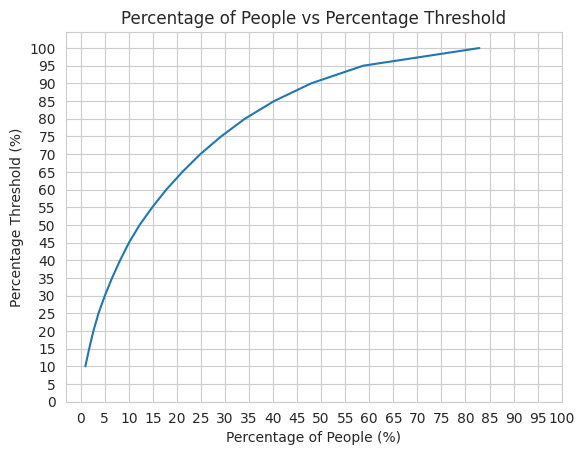

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.lineplot(x =percentage_summary_sort['percentage_people'], y = percentage_summary_sort['Percentage_Threshold'])

plt.xticks(range(0, 105, 5))
plt.yticks(range(0, 105, 5))

# Set x-axis and y-axis labels
plt.xlabel("Percentage of People (%)")
plt.ylabel("Percentage Threshold (%)")

# Set plot title
plt.title("Percentage of People vs Percentage Threshold")

# Show the plot
plt.show()

* **High-Value Customers (Top 10%):** *These are users who contribute significantly to the total transaction amount. They make up 10% of the users but account for 40% of the total transaction amount. They are likely to be your most valuable and frequent customers.*

* **Mid-Value Customers (11%-40%):** *These users contribute moderately to the total transaction amount. They make up around 45% of the users and account for 40% of the total transaction amount. They may be regular users who make transactions on a somewhat consistent basis.*

* **Low-Value Customers (41%-80%):** *These users contribute a smaller portion of the total transaction amount. They make up around 14% of the users and account for 10% of the total transaction amount. They might be occasional users or those who make smaller transactions.*

* **Occasional Customers (Bottom 20%):** *These users contribute the least to the total transaction amount. They make up 20% of the users but account for only 1% of the total transaction amount. They might be occasional users who make infrequent or very small transactions*.


In [44]:
# Calculate the total number of users
total_users = len(temp_result_df_sorted)

# Define percentage ranges
top_10_percent = int(0.10 * total_users)
mid_11_to_40_percent = int(0.11 * total_users), int(0.40 * total_users)
low_41_to_80_percent = int(0.41 * total_users), int(0.80 * total_users)
last_20_percent = int(0.81 * total_users)

# Define user categories based on percentage ranges
user_categories = []

for index in temp_result_df_sorted.index:
    if index < top_10_percent:
        user_categories.append('high_val_cust')
    elif mid_11_to_40_percent[0] <= index < mid_11_to_40_percent[1]:
        user_categories.append('mid_val_cust')
    elif low_41_to_80_percent[0] <= index < low_41_to_80_percent[1]:
        user_categories.append('low_val_cust')
    else:
        user_categories.append('occasional_cust')

# Add the 'user_category' column to the DataFrame
temp_result_df_sorted['user_category'] = user_categories

# Print the resulting DataFrame
print("Resulting DataFrame with user categories:")
temp_result_df_sorted




Resulting DataFrame with user categories:


,USER_ID,Transaction_Percentage,user_category
0,06bb2d68-bf61-4030-8447-9de64d3ce490,1.400715,high_val_cust
1,d35f19f3-d9ad-48bf-bd1e-90f3ba4f0b98,1.171394,high_val_cust
2,d1bc3cd6-154e-479f-8957-a69cdf414462,0.894942,high_val_cust
3,6cae3eb6-515c-4811-8b51-32fb2e95da28,0.867503,high_val_cust
4,20100a1d-12bc-41ed-a5e1-bc46216e9696,0.849044,high_val_cust
...,...,...,...
936,25dce1a9-289f-4dc0-bd56-872ffcf3ad16,0.001109,occasional_cust
937,19be5a1d-6d20-454b-b2b7-7a0e90c6af58,0.001104,occasional_cust
938,34b957f3-917a-4b4a-9a86-0f66b0a83d8b,0.000757,occasional_cust
939,7eb81b2e-11c5-4519-9724-26401b369f91,0.000673,occasional_cust


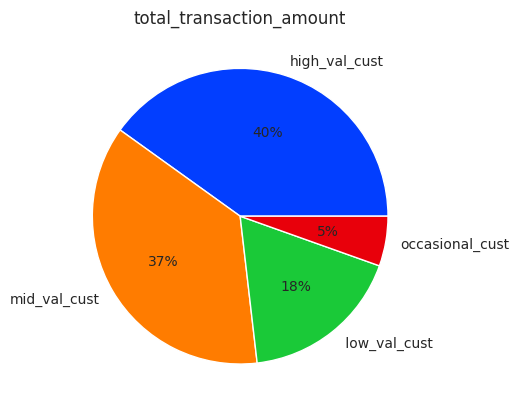

In [88]:
high_val_t = mid_val_t = low_val_t = occ_val_t = 0
for i in range(len(temp_result_df_sorted['USER_ID'])):
  if temp_result_df_sorted['user_category'][i] == 'high_val_cust':
    high_val_t = high_val_t+temp_result_df_sorted['Transaction_Percentage'][i]
  elif temp_result_df_sorted['user_category'][i] == 'mid_val_cust':
    mid_val_t = mid_val_t+temp_result_df_sorted['Transaction_Percentage'][i]
  elif temp_result_df_sorted['user_category'][i] == 'low_val_cust':
    low_val_t = low_val_t+temp_result_df_sorted['Transaction_Percentage'][i]
  else:
    occ_val_t = occ_val_t + temp_result_df_sorted['Transaction_Percentage'][i]

data_t = [ high_val_t, mid_val_t, low_val_t, occ_val_t]
key_t = ["high_val_cust", "mid_val_cust"," low_val_cust", "occasional_cust"]

# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

# plotting data on chart
plt.pie(data_t, labels=key_t, colors=palette_color, autopct='%.0f%%')
plt.title("total_transaction_amount")

# displaying chart
plt.show()

In [70]:
len(temp_result_df_sorted['USER_ID'].unique())

941

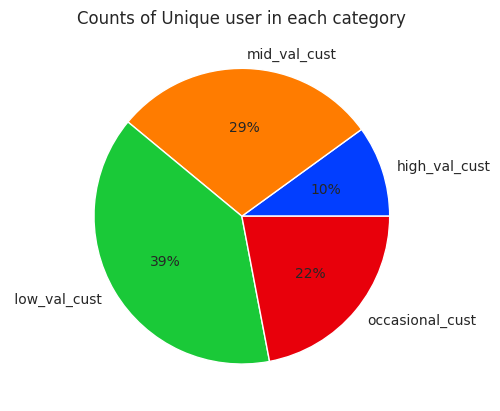

In [89]:
import seaborn
high_val = len(temp_result_df_sorted[temp_result_df_sorted['user_category']=='high_val_cust'])
mid_val = len(temp_result_df_sorted[temp_result_df_sorted['user_category']=='mid_val_cust'])
low_val = len(temp_result_df_sorted[temp_result_df_sorted['user_category']=='low_val_cust'])
occ_val = len(temp_result_df_sorted[temp_result_df_sorted['user_category']=='occasional_cust'])

data =[high_val, mid_val, low_val, occ_val]

keys = ["high_val_cust", "mid_val_cust"," low_val_cust", "occasional_cust"]

# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Counts of Unique user in each category")
# displaying chart
plt.show()



In [48]:
# Create a dictionary mapping USER_ID to user_category from temp_result_df_sorted
user_category_mapping = temp_result_df_sorted.set_index('USER_ID')['user_category'].to_dict()

# Map user_category values to the data DataFrame using the dictionary
data['user_category'] = data['USER_ID'].map(user_category_mapping)

In [49]:
data


,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT,user_category
0,2016-01-09 0:18:14,9/1/2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,high_val_cust
1,2016-01-09 2:28:34,9/1/2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,low_val_cust
2,2016-01-09 4:00:34,9/1/2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,mid_val_cust
3,2016-01-09 10:26:27,9/1/2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,high_val_cust
5,2016-01-09 12:16:52,9/1/2016,20100a1d-12bc-41ed-a5e1-bc46216e9696,19931f9b-d87a-411e-9797-57271aead71d,TOPUP,EUR,267.71,high_val_cust
...,...,...,...,...,...,...,...,...
9986,2017-01-08 16:51:42,8/1/2017,825fa46b-69f0-446b-803e-57d47162a25e,29282533-ca82-4006-9dfa-4abb5018fbd5,ATM,EUR,244.40,mid_val_cust
9987,2017-01-08 16:52:53,8/1/2017,825fa46b-69f0-446b-803e-57d47162a25e,8cf3d897-e988-4f8d-9487-ac9a3f01bbca,TOPUP,EUR,245.65,mid_val_cust
9988,2017-01-08 17:38:36,8/1/2017,64f168e8-0468-47f0-a6d0-fe5d70c9af63,83254385-bf38-481f-8db4-dd0b62e5064a,CARD_PAYMENT,EUR,147.88,mid_val_cust
9989,2017-01-08 18:30:31,8/1/2017,dda53aa4-bf35-4fb0-baf3-849819bb9aa3,95e8866f-f711-4fb2-b875-ade62dc8c486,CARD_PAYMENT,EUR,173.00,occasional_cust


In [50]:
grouped = data.groupby(['TYPE', 'CURRENCY', 'user_category'])

# Calculate counts, total transaction amounts, and number of users for each category
result = grouped.agg({
    'TRANSACTION_ID': 'count',
    'AMOUNT': 'sum',
    'USER_ID': 'nunique'
}).reset_index()

# Pivot the table to desired format
pivot_table = result.pivot_table(
    index=['TYPE', 'CURRENCY'],
    columns='user_category',
    values=['TRANSACTION_ID', 'AMOUNT', 'USER_ID'],
    aggfunc='sum'
)

# Flatten the multi-level column index
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]

# Print the pivoted table
print("Pivoted table:")
pivot_table

Pivoted table:


,,AMOUNT_high_val_cust,AMOUNT_low_val_cust,AMOUNT_mid_val_cust,AMOUNT_occasional_cust,TRANSACTION_ID_high_val_cust,TRANSACTION_ID_low_val_cust,TRANSACTION_ID_mid_val_cust,TRANSACTION_ID_occasional_cust,USER_ID_high_val_cust,USER_ID_low_val_cust,USER_ID_mid_val_cust,USER_ID_occasional_cust
TYPE,CURRENCY,,,,,,,,,,,,
ATM,EUR,82422.64,40758.64,80240.63,9718.54,456,222,445,86,92,174,220,66
BANK_TRANSFER,EUR,88625.53,33836.24,69596.57,13068.77,494,194,398,95,94,165,216,68
CARD_PAYMENT,EUR,81220.45,37883.03,80248.88,10763.41,435,203,431,78,93,168,221,67
P2P_TRANSFER,EUR,6985.63,2535.45,9173.51,1211.23,37,14,44,10,26,14,40,8
TOPUP,EUR,82453.91,35964.56,73962.20,11693.53,465,212,436,96,94,166,225,73


In [51]:

# Convert CREATED_DATE to datetime
data['CREATED_DATE'] = pd.to_datetime(data['CREATED_DATE'])

# Add a new column for time intervals
data['TIME_INTERVAL'] = pd.cut(data['CREATED_DATE'].dt.hour, bins=[0, 3, 6, 9, 12, 15, 18, 21, 24], labels=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])

# Group by 'TYPE', 'CURRENCY', 'user_category', and 'TIME_INTERVAL'
grouped = data.groupby(['TYPE', 'CURRENCY', 'user_category', 'TIME_INTERVAL'])

# Calculate counts, total transaction amounts, and number of users for each category
result = grouped.agg({
    'AMOUNT': 'sum',
    'CREATED_DATE': 'count',
    'USER_ID': 'nunique'
}).reset_index()

# Pivot the table to desired format
pivot_table = result.pivot_table(
    index=['TYPE', 'CURRENCY', 'TIME_INTERVAL'],
    columns='user_category',
    values=['AMOUNT', 'CREATED_DATE', 'USER_ID'],
    aggfunc='sum'
)

# Flatten the multi-level column index
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]

# Print the pivoted table
print("Pivoted table:")
pivot_table

Pivoted table:


AMOUNT_high_val_cust  \
TYPE          CURRENCY TIME_INTERVAL                         
ATM           EUR      0-3                         3993.68   
                       3-6                         5122.66   
                       6-9                         9652.83   
                       9-12                       13212.29   
                       12-15                      15288.31   
                       15-18                      16855.21   
                       18-21                      10252.66   
                       21-24                       5899.08   
BANK_TRANSFER EUR      0-3                         5993.45   
                       3-6                         5190.21   
                       6-9                         9187.60   
                       9-12                       18045.41   
                       12-15                      16954.21   
                       15-18                      13157.68   
                       18-21                      11473.32   
                       21-24                       5405.61   
CARD_PAYMENT  EUR      0-3                         4762.97   
                       3-6                         4604.96   
                       6-9                        10474.61   
                       9-12                       12991.86   
                       12-15                      17248.70   
                       15-18                      12429.09   
                       18-21                      12075.25   
                       21-24                       5367.81   
P2P_TRANSFER  EUR      0-3                          249.69   
                       3-6                          270.47   
                       6-9                         1539.77   
                       9-12                         772.64   
                       12-15                       1572.99   
                       15-18                        633.57   
                       18-21                        898.95   
                       21-24                        556.40   
TOPUP         EUR      0-3                         5709.49   
                       3-6                         4832.58   
                       6-9                        10626.15   
                       9-12                       12998.03   
                       12-15                      15524.70   
                       15-18                      15083.29   
                       18-21                      10445.05   
                       21-24                       4230.79   

                                      AMOUNT_low_val_cust  \
TYPE          CURRENCY TIME_INTERVAL                        
ATM           EUR      0-3                        2682.42   
                       3-6                        2573.10   
                       6-9                        6108.63   
                       9-12                       7939.07   
                       12-15                      5340.94   
                       15-18                      7931.05   
                       18-21                      4935.94   
                       21-24                      2542.77   
BANK_TRANSFER EUR      0-3                        1860.75   
                       3-6                        1064.29   
                       6-9                        3183.84   
                       9-12                       5646.48   
                       12-15                      5406.99   
                       15-18                      8177.89   
                       18-21                      6205.34   
                       21-24                      1709.31   
CARD_PAYMENT  EUR      0-3                        2292.40   
                       3-6                        1718.38   
                       6-9                        4146.74   
                       9-12                       6705.95   
                       12-15                      6887.30   
                       15-18  

In [52]:
pivot_table.to_csv("EIR_gbp.csv")